<a href="https://colab.research.google.com/github/anil2k/StableDefussion-Synthetic-Data-Generation/blob/main/StableDefussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Data Generation using StableDefussion

Install diffusers and huggingface_hub requirements

In [1]:
!pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.5 MB/s eta 0:00:00


Login huggingface using token

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
import torch
from diffusers import StableDiffusionPipeline

# Create a StableDiffusionPipeline instance by loading a pre-trained model.
# Use 16-bit floating-point precision for torch data type (float16).
# The 'revision' parameter specifies the model revision as "fp16".
pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, revision="fp16"
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [4]:
# pipeline = pipeline.to("cpu")
pipeline = pipeline.to("cuda")

Define a function that generates images based on an input prompt and saves them to a specified location.

In [5]:
import os
from IPython.display import Image, display

def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="images",
    display_images=False,
):

    # Calculate the number of iterations needed to generate the desired number of images
    num_iterations = num_images_to_generate // num_images_per_prompt

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Loop through the iterations
    for i in range(num_iterations):
        # Generate a batch of images using pipeline
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )

        # Loop through the generated images in the batch
        for idx, image in enumerate(images.images):
            # Define the name of the image file
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"

            # Save the generated image to the specified output directory
            image.save(image_name)

            # Display the image if the 'display_images' flag is set to True
            if display_images:
                display(Image(filename=image_name, width=128, height=128))


  0%|          | 0/50 [00:00<?, ?it/s]

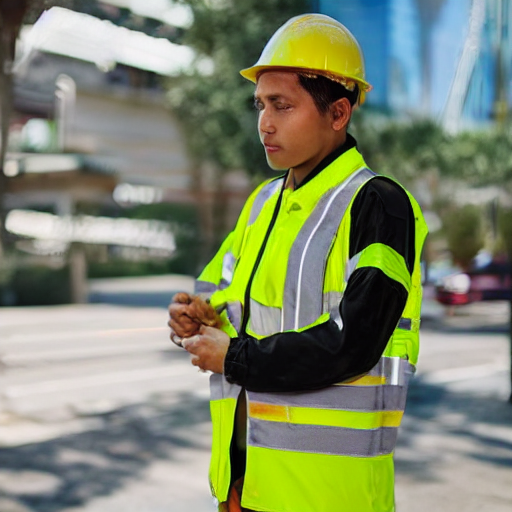

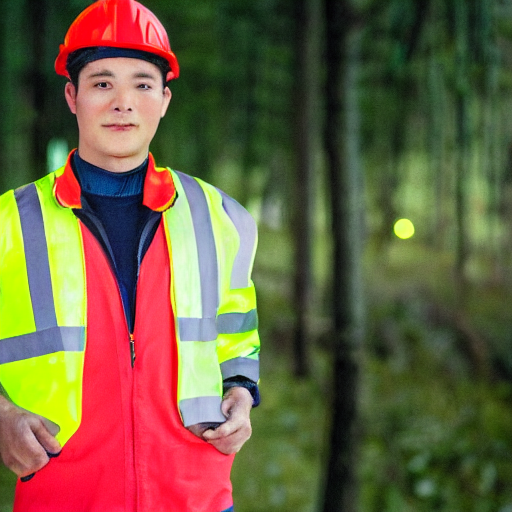

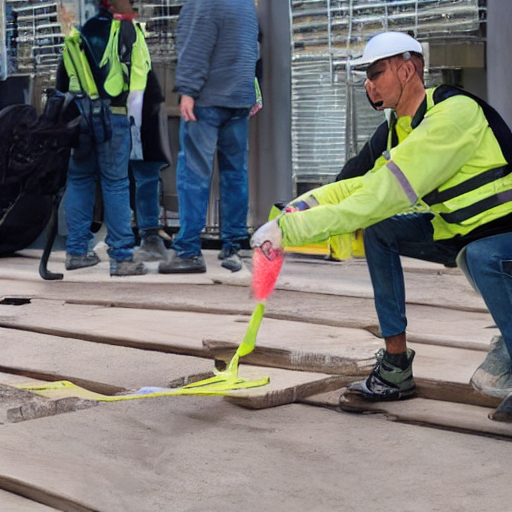

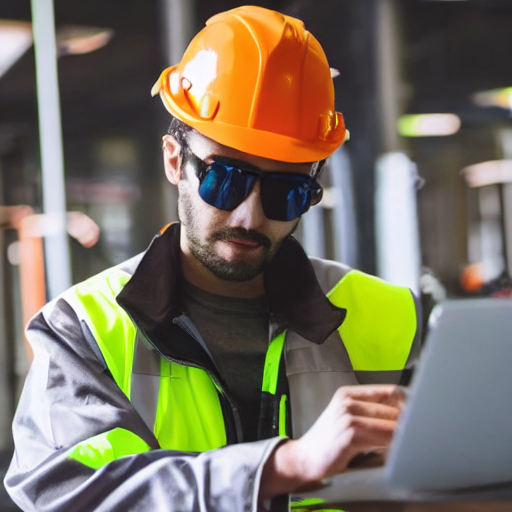

  0%|          | 0/50 [00:00<?, ?it/s]

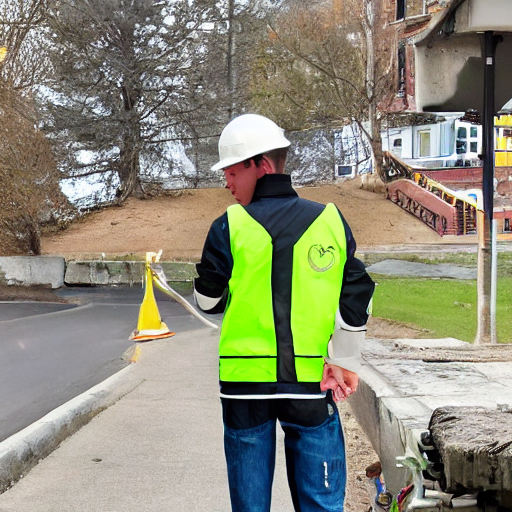

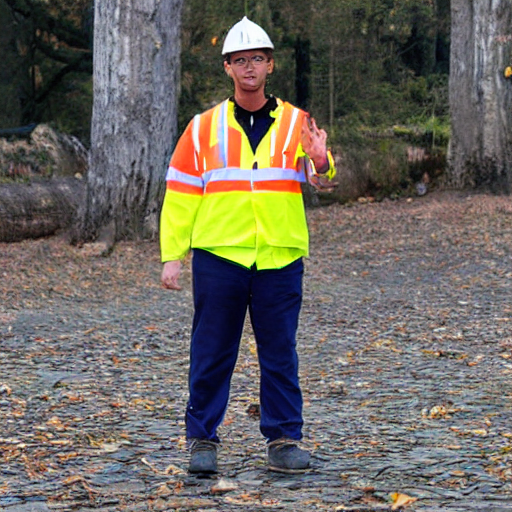

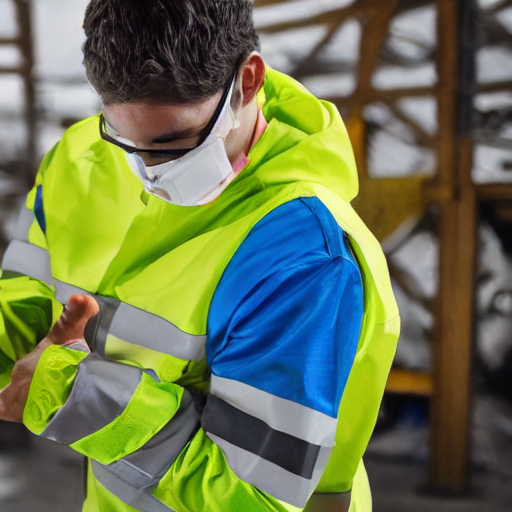

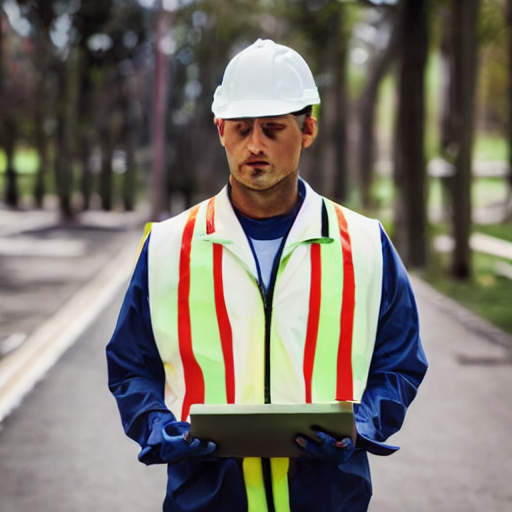

In [7]:
generate_images("worker wearing saftey reflective jacket", num_images_to_generate=10, guidance_scale=4, output_dir="images",display_images=True)